# Intro to pandas - Solutions

<hr style="clear:both">

This notebook is part of a series of exercises for the CIVIL-226 Introduction to Machine Learning for Engineers course at EPFL. Copyright (c) 2022 [VITA](https://www.epfl.ch/labs/vita/) lab at EPFL  
Use of this source code is governed by an MIT-style license that can be found in the LICENSE file or at https://www.opensource.org/licenses/MIT

**Author(s):** [David Mizrahi](mailto:david.mizrahi@epfl.ch)

**2022 TAs:** [Brian Sifringer](mailto:brian.sifringer@epfl.ch), [Bastien Van Delft](mailto:bastien.vandelft@epfl.ch), [Taylor Mordan](mailto:taylor.mordan@epfl.ch), [Victor Dubien](mailto:victor.dubien@epfl.ch), [David Mizrahi](mailto:david.mizrahi@epfl.ch)
<hr style="clear:both">

[pandas](https://pandas.pydata.org/) is a fast, powerful and flexible package for data manipulation and analysis in Python, built on top of NumPy.

It provides:
- a fast and efficient DataFrame object for data manipulation, with integrated indexing
- tools for reading and writing data between in-memory data and various file formats 
- easy handling of missing data
- easy conversion to and from NumPy arrays 
- [and much more](https://pandas.pydata.org/about/index.html)

Pandas has quickly become a fundamental package for data science in Python. In this tutorial, we'll cover the basics of this package and show how it can be used to handle real-world data for ML applications.

In addition, we'll also briefly cover the seaborn package, which we'll use to generate informative plots from pandas data.


<img src="images/stack_overflow_traffic.png" width=500></img>

Source: https://stackoverflow.blog/2017/09/14/python-growing-quickly/

**Note:** Unlike previous tutorials, there is no code to write here. Just read through it and run the cells. For a more hands-on tutorial, we recommend the [pandas course on Kaggle](https://www.kaggle.com/learn/pandas).

**Note:** This solution is exactly identical to the exercise, except that the cells are now executed.

In [1]:
import numpy as np
import pandas as pd

## 1. Basics

A **DataFrame** is the primary data structure in Pandas. It is a data table composed of rows and columns.

You can also refer to the 2 dimensions of a DataFrame as axes, with axis 0 corresponding to the row index, and axis 1 to the column index.

Each column of a DataFrame can be of a different type such as integers, floats, booleans, datetime or even `object`, which can hold any Python object 

<img src="images/dataframe.png" width=400></img>

In this part, we'll cover basic pandas operations.

### Creating a DataFrame

In [2]:
data = np.array([[21, 184], [19, 168], [36, 178], [34, 175], [63, 159], [25, 165]])
# df is an abbrevation of DataFrame
df = pd.DataFrame(data=data, columns=["age", "height (cm)"])

# Show DataFrame
df

,age,height (cm)
0,21,184
1,19,168
2,36,178
3,34,175
4,63,159
5,25,165


### Accessing specific columns

Accessing a single object returns a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), which is a one-dimensional ndarray with axis labels.

In [3]:
# Accessing only the age column (as a pd.Series object)
df["age"]

0    21
1    19
2    36
3    34
4    63
5    25
Name: age, dtype: int64

### Adding columns

In [4]:
df["sex"] = ["M", "F", "M", "F", "F", "M"]
df["height (m)"] = df["height (cm)"] / 100

# Show updated DataFrame
df

,age,height (cm),sex,height (m)
0,21,184,M,1.84
1,19,168,F,1.68
2,36,178,M,1.78
3,34,175,F,1.75
4,63,159,F,1.59
5,25,165,M,1.65


### Removing columns

In [5]:
df = df.drop(columns="height (m)")
df

,age,height (cm),sex
0,21,184,M
1,19,168,F
2,36,178,M
3,34,175,F
4,63,159,F
5,25,165,M


By default, operations in pandas are not in-place (i.e. they return a copy, and don't modify the original object). This can be changed by adding `inplace=False` as a parameter.

### Adding rows

In [6]:
df = df.append({"age": 29, "height (cm)": 172, "sex": "F"}, ignore_index=True)
df

,age,height (cm),sex
0,21,184,M
1,19,168,F
2,36,178,M
3,34,175,F
4,63,159,F
5,25,165,M
6,29,172,F


### Boolean indexing / slicing

More info: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [7]:
# In the df DataFrame, show me only the rows in which the "sex" column is "F"
df[df["sex"] == "F"]

,age,height (cm),sex
1,19,168,F
3,34,175,F
4,63,159,F
6,29,172,F


In [8]:
# In the df DataFrame, show me only the rows in which the "sex" column is "M" AND (&) the "age" is below 30
df[(df["sex"] == "M") & (df["age"] < 30)]

,age,height (cm),sex
0,21,184,M
5,25,165,M


In [9]:
# In the df DataFrame, show me only the rows in which the "sex" column is "F" OR (|) in which (the "sex" column is "M" AND (&) the age is below 30)
df[(df["sex"] == "F") | ((df["sex"] == "M") & (df["age"] < 30))]

,age,height (cm),sex
0,21,184,M
1,19,168,F
3,34,175,F
4,63,159,F
5,25,165,M
6,29,172,F


### Sorting

In [10]:
# Sort values by age in ascending order
df.sort_values(by="age")

,age,height (cm),sex
1,19,168,F
0,21,184,M
5,25,165,M
6,29,172,F
3,34,175,F
2,36,178,M
4,63,159,F


In [11]:
# Sort values first by sex, then by age in descending order
df.sort_values(by=["sex", "age"], ascending=False)

,age,height (cm),sex
2,36,178,M
5,25,165,M
0,21,184,M
4,63,159,F
3,34,175,F
6,29,172,F
1,19,168,F


###  Grouping

More info: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [12]:
df.groupby("sex")["height (cm)"].mean()

sex
F    168.500000
M    175.666667
Name: height (cm), dtype: float64

## 2. I/O

Pandas supports reading from and writing to many data formats, such as CSV, JSON, Pickle, Excel, and more.

### Writing

Here's how to write our current DataFrame `df` to a file.

Here are some of the formats you can write to:
- `.to_csv`
- `.to_json`
- `.to_excel`
- `.to_pickle`
- `.to_clipboard`
- `.to_markdown`
- `.to_latex` (very useful for papers / reports)

In [13]:
# index=False means we don't want to add our index to the CSV file
df.to_csv("demo_df.csv", index=False)

### Reading

Now, we'll load a real-world dataset which contains data for 891 of the Titanic's passengers.

In [14]:
titanic = pd.read_csv("data/titanic.csv")

Here are some of the formats you can read from:
- `pd.read_csv`
- `pd.read_json`
- `pd.read_excel`
- `pd.read_pickle`
- `pd.read_clipboard`

More info about I/O in pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

## 3. Exploratory data analysis

Let's suppose we want to use our  dataset to create a model that predicts which passengers survived the Titanic shipwreck. 

<img src="images/titanic.jpg" width=400></img>

What do we know about the Titanic? It's a boat. It hit an iceberg. It sank. This is definitely not enough information to build a solid classifier.


This is where exploratory data analysis comes into play. It helps us understand how our data looks like, and how it can be processed and manipulated into something meaningful.

### Preview

When dataframes are large, it's not feasible to view the entirety of rows. The `head()`, `tail()` and `sample()` functions can be used to glance at a few of the rows of the datasets and better understand how the data looks like.

- `.head(n)` returns the first n rows
- `.tail(n)` returns the last n rows
- `.sample(n)` returns a random sample of the rows (can also be `.sample(frac=m)` to return a fraction of the total number of rows)

In [15]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [17]:
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
756,0,3,male,28.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
161,1,2,female,40.0,0,0,15.7500,S,Second,woman,False,NaN,Southampton,yes,True
356,1,1,female,22.0,0,1,55.0000,S,First,woman,False,E,Southampton,yes,False
812,0,2,male,35.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
501,0,3,female,21.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,no,True


### Shape and column information

`shape` works just like it does in NumPy. Here, the first value is the number of rows and the second is the number of columns.

In [18]:
titanic.shape

(891, 15)

`info()` prints a concise summary of the DataFrame. It gives, for each column, its type and the number of columns that are non-null (not `NaN`). It also provides the memory usage of the DataFrame.

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### Descriptive statistics

`describe()` generates descriptive statistics, such as the mean, standard deviation, mean, max and quartiles.

By default, it only analyzes the numeric columns of a DataFrame, but this can be changed by adding `include="all"` as a parameter.

In [20]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Unique values

Some of these columns can be a bit obscure, using `.unique()` can shed some light about which values are contained in these columns.

In [22]:
titanic["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [23]:
titanic["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
titanic["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [25]:
titanic["alive"].unique()

array(['no', 'yes'], dtype=object)

In [26]:
titanic["deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

### Redundant information

Looking at this data, it seems like "survived" and "alive" are quite similar, but are written in a different way. Let's see if that's the case.

In [27]:
titanic[(titanic["survived"] == 1) & (titanic["alive"] == "yes")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [28]:
titanic[(titanic["survived"] == 1) & (titanic["alive"] == "no")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


Using `.all()`, we can check if these two columns actually encode the same information.

In [29]:
((titanic["alive"] == "yes") == (titanic["survived"] == 1)).all()

True

In [30]:
((titanic["alive"] == "no") == (titanic["survived"] == 0)).all()

True

This also applies for the columns "embarked" and "embark_town", as well as "pclass" and "class", so we'll only keep one of each. In addition, the "adult_male" column can be directly obtained from the "who" column, so we'll remove it and work on this reduced DataFrame for the rest of the exercise.

In [31]:
keep_cols = ["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embark_town", "deck", "who", "alone"]
titanic = titanic[keep_cols].copy()
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'deck', 'who', 'alone'],
      dtype='object')

Let's now clarify what these columns mean:
- **survived**: Survival of the passenger (0 = No, 1 = Yes)
- **pclass**: Ticket class (1= 1st, 2 = 2nd, 3 = 3rd)
- **sex**: Sex
- **age**: Age
- **sibsp**: # of siblings / spouses aboard the Titanic
- **parch**: # of parents / children aboard the Titanic
- **fare**: Passenger fare
- **embark_town**: Port of embarkation (Southampton, Cherbourg, Queenstown)
- **deck**: Ship deck (A to F)
- **who**: man, woman or child
- **alone**: Whether the passenger is alone or not

## 4. Plotting

Let's now see how we can generate informative plots from DataFrames.

Plots are a great way to get some insight on the data you're working with, as it can help you uncover relations between different features and visualize distributions.

In [32]:
# Import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting with pandas

Pandas offer plotting functionality with the `.plot` functions, which wrap-around matplotlib.pyplot's `plot()`. 

More info about plotting with pandas can be found at: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Here are two simple examples:

<AxesSubplot:xlabel='age', ylabel='fare'>

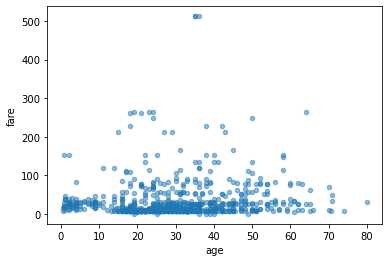

In [33]:
titanic.plot.scatter(x="age", y="fare", alpha=0.5)

Text(0, 0.5, 'count')

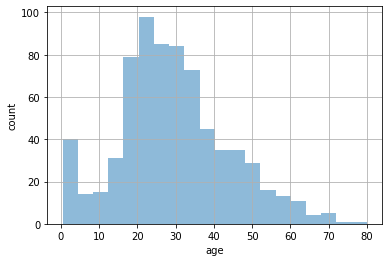

In [34]:
titanic["age"].hist(bins=20, alpha=0.5)
plt.xlabel("age")
plt.ylabel("count")

### Plotting with seaborn

Seaborn is a data visualization library based on matplotlib, which works very nicely with pandas DataFrames, allowing you to very quickly generate complex, informative (and aesthetically pleasing) plots. In this section, we'll show some of the plots that can be generated with seaborn.

For a more in-depth seaborn tutorial, check out the official tutorial: https://seaborn.pydata.org/tutorial.html

Let's improve on the two previous plots by adding the "sex" column as hue.

<AxesSubplot:xlabel='age', ylabel='fare'>

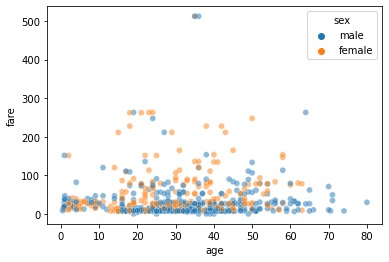

In [35]:
sns.scatterplot(data=titanic, x="age", y="fare", hue="sex", alpha=0.5)

#### Distributions

Visualizing distributions is a good way to find heavy tails and other key information about a feature's distribution, which can help you decide whether or not to truncate / scale features.

<AxesSubplot:xlabel='age', ylabel='Count'>

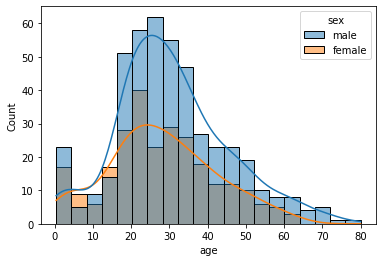

In [36]:
# Visualize distribution with a histogram
# KDE = Kernel Density Estimation
sns.histplot(data=titanic, x="age", hue="sex", kde=True)

Empirical Cumulative Distribution Function (ECDF) plots are another great way to visualize distributions.

<AxesSubplot:xlabel='age', ylabel='Proportion'>

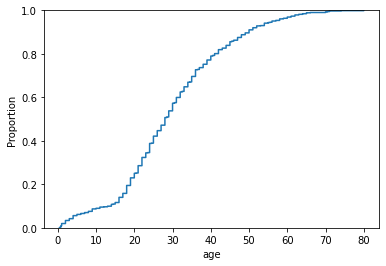

In [37]:
sns.ecdfplot(data=titanic, x="age")

#### Categorical data

Now, let's use a variety of plots offered by seaborn (such as count plots, box plots and violin plots) to gain a better insight on some of the features.

<AxesSubplot:xlabel='pclass', ylabel='count'>

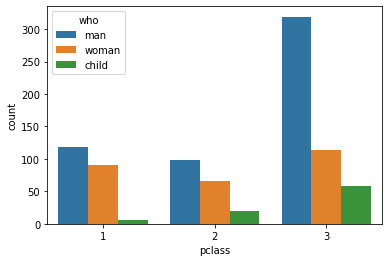

In [38]:
sns.countplot(data=titanic, x="pclass", hue="who")

<AxesSubplot:xlabel='pclass', ylabel='age'>

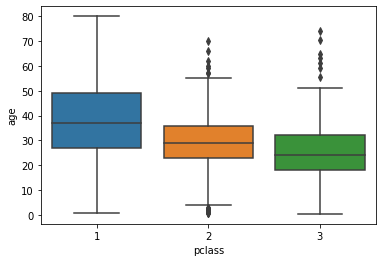

In [39]:
sns.boxplot(data=titanic, x="pclass", y="age")

<AxesSubplot:xlabel='pclass', ylabel='age'>

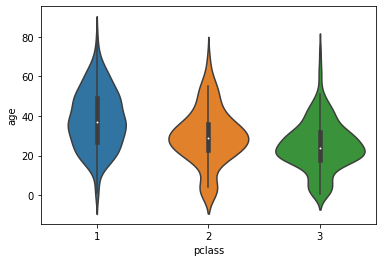

In [40]:
sns.violinplot(data=titanic, x="pclass", y="age")

Seaborn also computes confidence intervals using [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

<AxesSubplot:xlabel='pclass', ylabel='survived'>

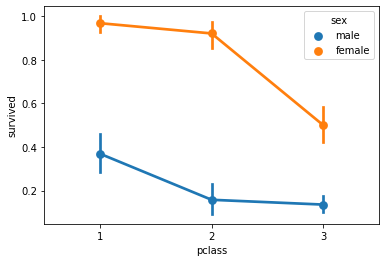

In [41]:
sns.pointplot(data=titanic, y="survived", x="pclass", hue="sex")

The previous plot reveals two key features for predicting which passengers survived the shipwreck.

#### Multi-plot grids

More advanced (and harder to plot), but can offer very insightful visualizations.

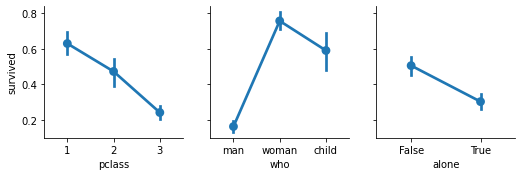

In [42]:
grid = sns.PairGrid(data=titanic, y_vars="survived", x_vars=["pclass", "who", "alone"])
grid.map(sns.pointplot)

That's all for seaborn!  For more examples of plots that can be generated with this library, check out the [seaborn example gallery](https://seaborn.pydata.org/examples/index.html).

## 5. Data cleaning / wrangling

Let's now cover how to use pandas to clean / transform our data into a proper dataset for machine learning tasks.

In [43]:
# Quick preview of the dataset (with columns removed from part 3)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,deck,who,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,NaN,man,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,C,woman,False
2,1,3,female,26.0,0,0,7.9250,Southampton,NaN,woman,True
3,1,1,female,35.0,1,0,53.1000,Southampton,C,woman,False
4,0,3,male,35.0,0,0,8.0500,Southampton,NaN,man,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,NaN,man,True
887,1,1,female,19.0,0,0,30.0000,Southampton,B,woman,True
888,0,3,female,NaN,1,2,23.4500,Southampton,NaN,woman,False
889,1,1,male,26.0,0,0,30.0000,Cherbourg,C,man,True


### Binning

Binning features is very easy with `cut` and `qcut`.

- `pd.cut` bins values into discrete intervals. These bins are equal-width bins (uniform binning) when providing an `int` for  the `bins` parameters, but these bins can be whichever values you want by providing a sequence of scalars instead.
- `pd.qcut` bins values using quantiles (quantile binning) instead.

In [44]:
titanic["age_group"] = pd.cut(x=titanic["age"], bins=5)
titanic["age_group"]

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888                 NaN
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: age_group, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [45]:
titanic["fare_group"] = pd.qcut(x=titanic["fare"], q=5)
titanic["fare_group"]

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare_group, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

### Missing values

In [46]:
# Let's make a copy of the dataframe called `titanic_ml` to prevent destructive changes
titanic_ml = titanic.copy()

In [47]:
# Find which columns have missing values
titanic_ml.isna().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embark_town     True
deck            True
who            False
alone          False
age_group       True
fare_group     False
dtype: bool

In [48]:
# Alternative approach: check non-null count, which also informs us of how many values are NaN
titanic_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embark_town  889 non-null    object  
 8   deck         203 non-null    object  
 9   who          891 non-null    object  
 10  alone        891 non-null    bool    
 11  age_group    714 non-null    category
 12  fare_group   891 non-null    category
dtypes: bool(1), category(2), float64(2), int64(4), object(4)
memory usage: 72.8+ KB


#### Imputation
Imputation can be done using `fillna`.

In [49]:
# Mean imputation for age (just as an example, there are many other approaches that are valid)
titanic_ml["age"] = titanic_ml["age"].fillna(titanic["age"].mean())

#### Deletion

`dropna()` can be used for deletion.
- The `subset` parameter can be used to only drop missing values from a few columns / columns.
- `axis=0` drops rows, `axis=1` drops columns.

In [50]:
# Only 2 rows don't have NaN for embark_town, let's drop it
titanic_ml = titanic_ml.dropna(subset=["embark_town"], axis=0)

In [51]:
# Drop all the columns containing NaN
titanic_ml = titanic_ml.dropna(axis=1)

In [52]:
# How does our data look like now?
titanic_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embark_town  889 non-null    object  
 8   who          889 non-null    object  
 9   alone        889 non-null    bool    
 10  fare_group   889 non-null    category
dtypes: bool(1), category(1), float64(2), int64(4), object(3)
memory usage: 71.4+ KB


### One-hot encoding

For most ML algorithms, we want our data to be entirely numerical, this requires encoding categorical features.

One-hot encoding can be performed using `pd.get_dummies()`.

In [53]:
titanic_ml = pd.get_dummies(titanic_ml)

In [54]:
titanic_ml

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman,"fare_group_(-0.001, 7.854]","fare_group_(7.854, 10.5]","fare_group_(10.5, 21.679]","fare_group_(21.679, 39.688]","fare_group_(39.688, 512.329]"
0,0,3,22.000000,1,0,7.2500,False,0,1,0,0,1,0,1,0,1,0,0,0,0
1,1,1,38.000000,1,0,71.2833,False,1,0,1,0,0,0,0,1,0,0,0,0,1
2,1,3,26.000000,0,0,7.9250,True,1,0,0,0,1,0,0,1,0,1,0,0,0
3,1,1,35.000000,1,0,53.1000,False,1,0,0,0,1,0,0,1,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,True,0,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,0,1,0,0,1,0,1,0,0,0,1,0,0
887,1,1,19.000000,0,0,30.0000,True,1,0,0,0,1,0,0,1,0,0,0,1,0
888,0,3,29.699118,1,2,23.4500,False,1,0,0,0,1,0,0,1,0,0,0,1,0
889,1,1,26.000000,0,0,30.0000,True,0,1,1,0,0,0,1,0,0,0,0,1,0


In [55]:
titanic_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survived                      889 non-null    int64  
 1   pclass                        889 non-null    int64  
 2   age                           889 non-null    float64
 3   sibsp                         889 non-null    int64  
 4   parch                         889 non-null    int64  
 5   fare                          889 non-null    float64
 6   alone                         889 non-null    bool   
 7   sex_female                    889 non-null    uint8  
 8   sex_male                      889 non-null    uint8  
 9   embark_town_Cherbourg         889 non-null    uint8  
 10  embark_town_Queenstown        889 non-null    uint8  
 11  embark_town_Southampton       889 non-null    uint8  
 12  who_child                     889 non-null    uint8  
 13  who_m

### To NumPy

All our columns are now numeric, we can further convert them all to the same data type (if needed) using `astype()` and then to NumPy using `to_numpy()`.

In [56]:
X = titanic_ml.drop(columns="survived").astype(float).to_numpy()
y = titanic_ml["survived"].to_numpy()

In [57]:
X[0:3]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  1.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ]])

In [58]:
X.shape

(889, 19)

In [59]:
y[0:3]

array([0, 1, 1])

In [60]:
y.shape

(889,)

And there we go! We covered the basics of pandas, as well as all the steps needed to go from a raw dataset to one usable by ML algorithms.

This processed dataset can now be used for classification with whichever package you desire (e.g. NumPy, as was done in previous weeks, or PyTorch and scikit-learn as we'll see later on).

Pandas is a very flexible package with many use cases, feel free to check out the additional resources to learn more about it.

## Additional pandas resources

- Pandas Cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf **<- VERY USEFUL**
- Pandas User Guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html
- API Reference: https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api
- Chapter 3 of the Python Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html
- Kaggle Pandas course: https://www.kaggle.com/learn/pandas
